In [12]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

%store -r df_prod
%store -r df_geo

Let's merge dataframes with geological and wells production data and inspect it

In [13]:
df = pd.merge(df_geo, df_prod, on='wellName', how='outer')

In [14]:
df

,Id,wellId,derivedFrom,fileId,wellName,lenF,effLenF,sandF,shalySandF,calciteF,coalF,permF,KL,KLsand,KLshalySand,linVolArch,linVolCap,RHOB,well_comp,well_PI_5
0,15.0,22.0,Las,11.0,3,1902.9,989.6,115.1,874.5,6.7,0.0,452.7,447995.4,358997.7,88997.7,88.2,112.7,51.2,AICD,5.681821
1,16.0,53.0,Las,12.0,5,1998.9,1113.2,266.5,846.7,46.8,16.9,1169.3,1301719.1,1177299.2,124420.0,136.5,165.5,227.6,AICV,0.387020
2,17.0,69.0,Las,13.0,11026,2327.4,1014.4,381.7,632.7,32.0,0.0,1615.8,1639041.2,1450631.3,188409.8,139.4,176.7,284.5,SAS,1.711985
3,18.0,70.0,Las,76.0,11024,1261.5,642.9,229.1,413.8,0.0,0.0,939.1,603748.6,539092.0,64656.6,92.5,93.4,49.1,SAS,3.875192
4,19.0,81.0,Las,68.0,11028,2026.8,850.2,284.1,566.1,5.1,0.0,1515.3,1288282.8,1127223.6,161059.2,142.9,143.6,136.7,SAS,2.751723
5,20.0,60.0,Las,16.0,11036,2103.9,1227.4,269.4,958.0,45.0,0.0,884.7,1085932.8,856059.6,229873.3,195.6,176.6,116.7,AICV,6.343946
6,65.0,17.0,Las,78.0,11032,1650.0,1321.4,726.0,595.4,84.7,0.0,2459.8,3250319.4,3017098.6,233220.8,282.2,278.2,521.2,AICV,12.376267
7,66.0,45.0,Las,52.0,11033,1875.8,1439.4,529.8,909.6,42.2,0.0,1243.5,1789837.1,1499784.4,290052.7,295.5,239.9,208.9,SSD ICD,7.146338
8,67.0,46.0,Las,53.0,11034,1861.1,1527.7,569.6,958.1,104.7,2.0,1401.2,2140641.1,1773608.0,367033.1,284.4,262.8,238.5,AICV,15.386915
9,68.0,47.0,Las,54.0,11035,1381.6,929.2,377.6,551.6,7.7,0.0,1690.1,1570439.2,1295123.9,275315.3,199.6,177.5,222.1,SSD ICD,4.955056


A lot of columns don't carry out a piece of useful information hence we can just get rid of them. In addition, 57, 58, 59 rows are consisting mostly of nan values and we are going to just delete them.

In [15]:
df = df.drop([58,59,57], axis = 0)
df= df.drop(['derivedFrom', 'Id', 'wellId', 'fileId'], axis = 1)

For further analysis, we also need to prepare categorical variables.

In [16]:
df = df.replace({'SAS':int(0), 'SSD ICD': int(1), 'AICD': int(2), 'AICV':int(3)})

In [598]:
PI_5 = 'well_PI_5'

df[PI_5].describe()

count    57.000000
mean      7.496412
std       7.807460
min       0.387020
25%       3.162475
50%       5.534591
75%       8.406283
max      52.487113
Name: well_PI_5, dtype: float64

<AxesSubplot:xlabel='well_PI_5', ylabel='Density'>

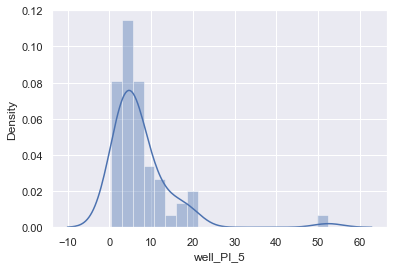

In [599]:
sns.distplot(df[PI_5])

<AxesSubplot:xlabel='RHOB', ylabel='well_PI_5'>

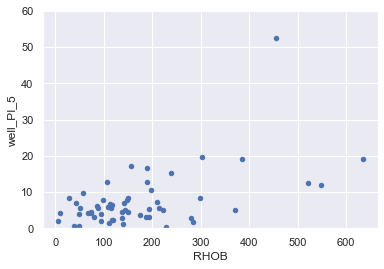

In [600]:
var = 'RHOB'
data = pd.concat([df[PI_5], df[var]], axis = 1)
data.plot.scatter(x=var, y = PI_5, ylim = (0, 60))

<AxesSubplot:xlabel='KL', ylabel='well_PI_5'>

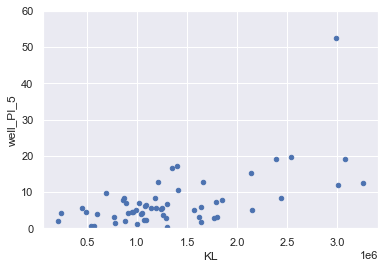

In [601]:
var = 'KL'
data = pd.concat([df[PI_5], df[var]], axis = 1)
data.plot.scatter(x=var, y = PI_5, ylim = (0, 60))

<AxesSubplot:xlabel='KLsand', ylabel='well_PI_5'>

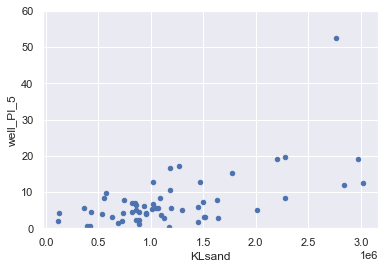

In [602]:
var = 'KLsand'
data = pd.concat([df[PI_5], df[var]], axis = 1)
data.plot.scatter(x=var, y = PI_5, ylim = (0, 60))

<AxesSubplot:>

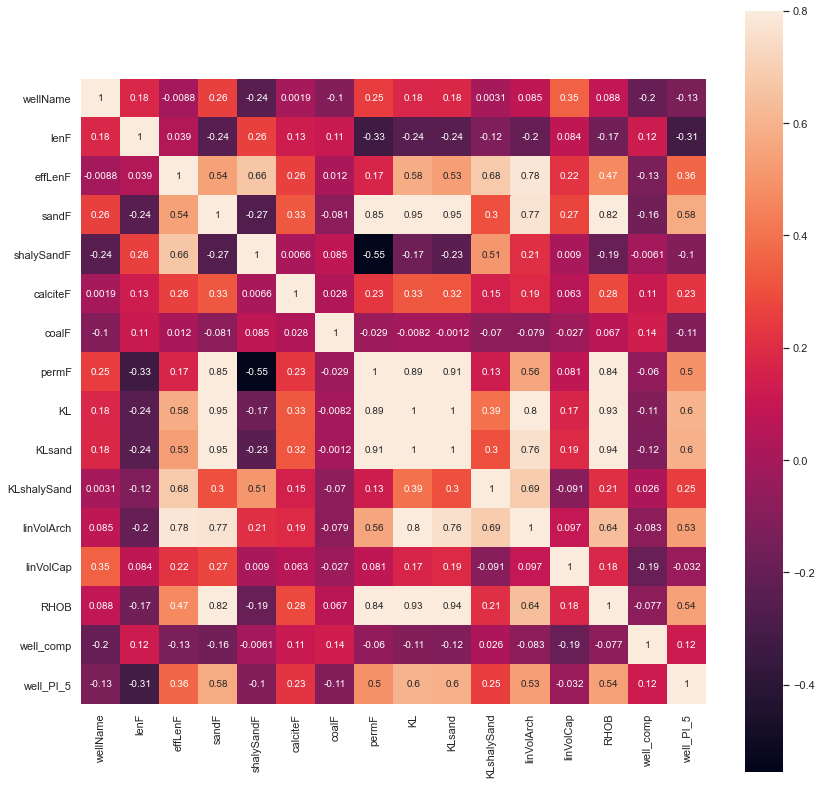

In [603]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(corrmat, vmax = 0.8, square=True, annot = True)

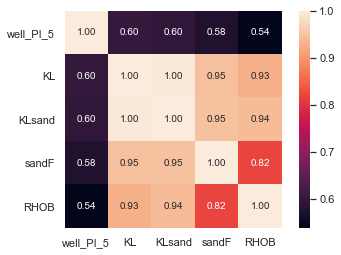

In [604]:
k = 5
cols = corrmat.nlargest(k, PI_5).index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

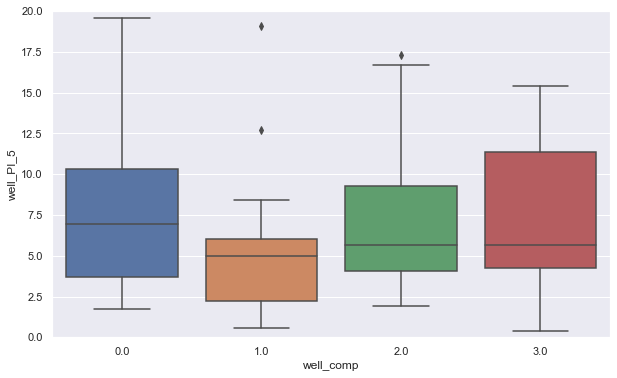

In [605]:
var = 'well_comp'
data = pd.concat([df['well_PI_5'], df[var]], axis = 1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y='well_PI_5', data = data)
fig.axis(ymin=0, ymax=20);

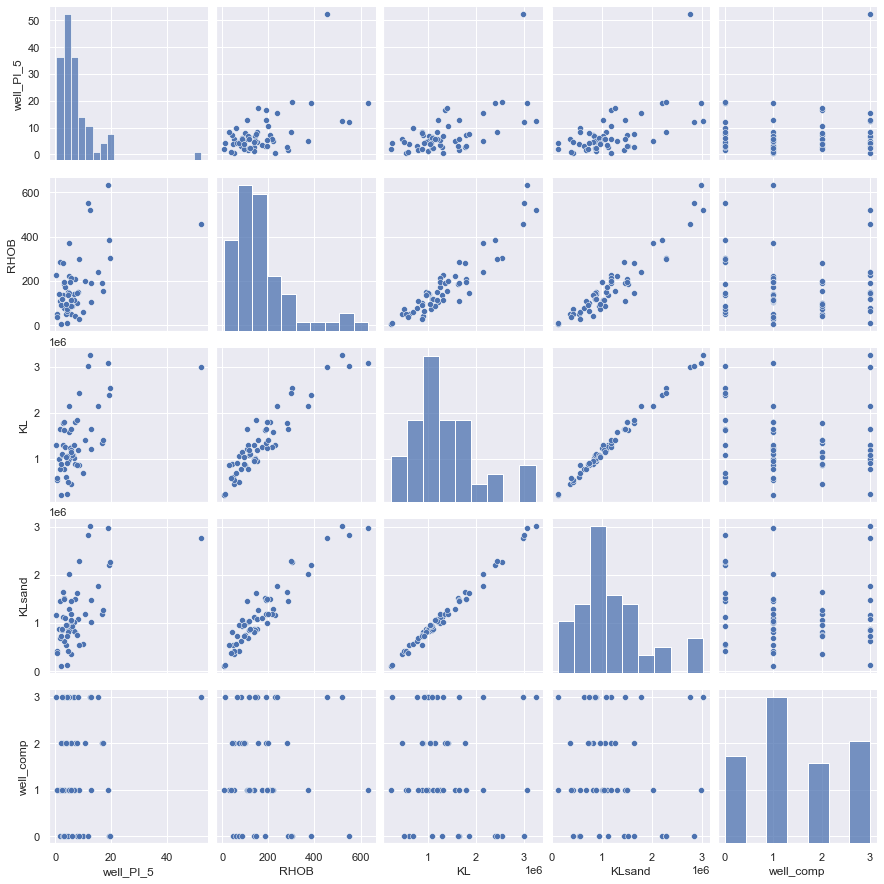

In [606]:
sns.set()
cols = [PI_5, 'RHOB', 'KL', 'KLsand', 'well_comp']
sns.pairplot(df[cols], size = 2.5)
plt.show();

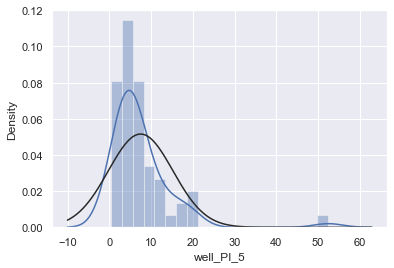

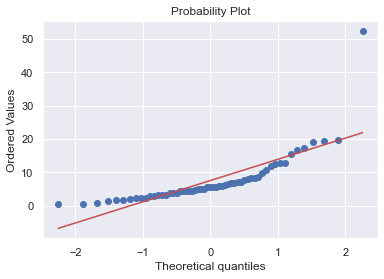

In [607]:
sns.distplot(df['well_PI_5'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['well_PI_5'], plot=plt)

In [613]:
df['well_PI_5'] = np.log(df['well_PI_5'])

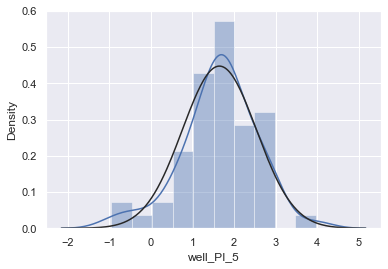

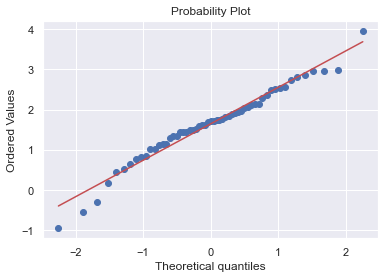

In [587]:
sns.distplot(df['well_PI_5'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['well_PI_5'], plot=plt)

<AxesSubplot:xlabel='sandF', ylabel='well_PI_5'>

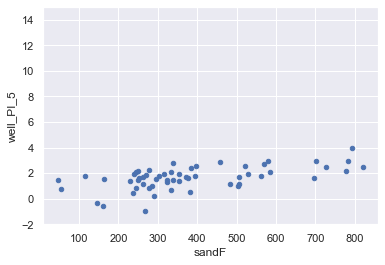

In [621]:
var = 'sandF'
data = pd.concat([df[PI_5], df[var]], axis = 1)
data.plot.scatter(x=var, y = PI_5, ylim = (-2, 15))


In [617]:
y_train = df[PI_5].values.reshape(-1, 1)
x_train = df['sandF'].values.reshape(-1, 1)
reg = LinearRegression()
reg.fit(x_train, y_train)
coef_a = float(reg.coef_)
coef_b = float(reg.intercept_)

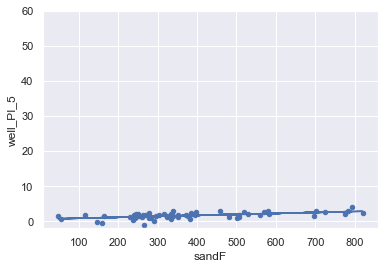

In [620]:
var = 'sandF'
data = pd.concat([df[PI_5], df[var]], axis = 1)
data.plot.scatter(x=var, y = PI_5, ylim = (-2, 60))

plt.plot(x_train, coef_a*x_train + coef_b)

In [619]:
reg.score(x_train, y_train)

0.3328698502805908

In [622]:
np.log(60)

4.0943445622221